Вы работаете аналитиком в компании, управляющей парком автомобилей каршеринга в большом городе. Компания хочет проанализировать данные за 6 месяцев, чтобы понять, как использовать автомобили эффективнее.

У вас есть файл carsharing.csv с колонками:

* Date — дата поездки (в формате YYYY-MM-DD)

* Car_ID — идентификатор автомобиля

* Duration_min — длительность аренды в минутах

* Distance_km — пройденное расстояние (км)

* Revenue — доход от поездки (руб.)

* Fuel_cost — стоимость топлива (руб.)

## Задания

#### 1. Предварительный анализ

Найдите 5 автомобилей с наибольшей выручкой за весь период.

Найдите 5 автомобилей с наименьшей средней рентабельностью (прибыль = Revenue - Fuel_cost).

#### 2. Временные ряды

Постройте график динамики средней выручки по дням.

Добавьте 7-дневное скользящее среднее.

#### 3. Будни vs выходные

Сравните среднюю длительность поездок, среднюю выручку и среднюю скорость (Distance_km / (Duration_min/60)) в будние и выходные дни.

Постройте сравнительные графики.

#### 4. Сравнительный анализ поездок

Постройте гистограмму длительности поездок и выделите аномально длинные поездки (выше 95-го перцентиля).

Постройте распределение средних скоростей.

#### 5. Кластеризация автомобилей

Для каждого автомобиля вычислите:

Среднюю выручку на поездку,

Среднюю длительность,

Среднюю скорость.

Проведите кластеризацию (3 кластера) с помощью k-means.

Постройте график кластеров и интерпретируйте их.

#### 6. Корреляции

Постройте корреляционную матрицу между признаками (Duration_min, Distance_km, Revenue, Fuel_cost, Avg_speed).

Визуализируйте её в виде тепловой карты.

#### 7. Прогнозирование

Используя полиномиальную регрессию (numpy.polyfit), постройте прогноз средней выручки на следующие 14 дней.

Нанесите прогноз на график вместе с реальными данными.

## Подсказки к заданиям

#### 1. Предварительный анализ

Используйте groupby в pandas для агрегирования по Car_ID.

Методы: .sum(), .mean(), .nlargest(), .nsmallest().

Введите новую колонку Profit = Revenue - Fuel_cost.

#### 2. Временные ряды

Сгруппируйте данные по Date, возьмите среднее (.groupby("Date").mean()).

Для скользящего среднего используйте .rolling(window=7).mean().

Визуализация: matplotlib.pyplot.plot().

#### 3. Будни vs выходные

Получите день недели через data["Date"].dt.weekday.

Будни: 0–4, выходные: 5–6.

Сравнение: снова groupby("IsWeekend").mean().

Визуализация: plot(kind="bar") или matplotlib.bar.

#### 4. Сравнительный анализ поездок

Постройте гистограмму с помощью plt.hist().

Найдите 95-й перцентиль через numpy.percentile().

Средняя скорость: создайте колонку Distance_km / (Duration_min/60).

Визуализация: гистограммы (plt.hist).

#### 5. Кластеризация автомобилей

Сначала агрегируйте данные по Car_ID (средние показатели).

Нормализация данных: StandardScaler из sklearn.preprocessing.

Кластеризация: KMeans(n_clusters=3) из sklearn.cluster.

Визуализация: plt.scatter() с цветами по меткам кластеров.

#### 6. Корреляции

Метод .corr() для расчёта матрицы корреляций.

Визуализация:

plt.imshow() (базовый способ),

или seaborn.heatmap() (более красиво, если библиотека разрешена).

#### 7. Прогнозирование

Создайте индекс-дни с помощью np.arange(len(daily_revenue)).

Аппроксимация: numpy.polyfit(x, y, deg=3) и numpy.poly1d().

Создайте прогноз на будущие точки (например, +14 дней).

Визуализация: plt.plot() для фактических данных и прогноза.

        Date  Car_ID  Duration_min  Distance_km     Revenue   Fuel_cost  \
0 2025-04-24       5           145    19.321968  591.499008  160.621620   
1 2025-04-24       7            41     4.780243  139.943581   29.045988   
2 2025-04-24      13            77    10.988166  326.938613   84.497091   
3 2025-04-24       4           165    20.181021  613.470961  133.380073   
4 2025-04-24      13           174    21.214181  677.747470  183.320302   

       Profit  Avg_speed  
0  430.877388   7.995297  
1  110.897593   6.995478  
2  242.441522   8.562207  
3  480.090888   7.338553  
4  494.427169   7.315235  
Топ-5 автомобилей по выручке:
 Car_ID
17    28090.503492
8     23470.018373
3     22071.410598
19    22066.529546
16    21835.712061
Name: Revenue, dtype: float64

5 автомобилей с наименьшей рентабельностью:
 Car_ID
5     239.103971
2     240.471526
6     243.856404
14    244.341284
9     244.795650
Name: Profit, dtype: float64


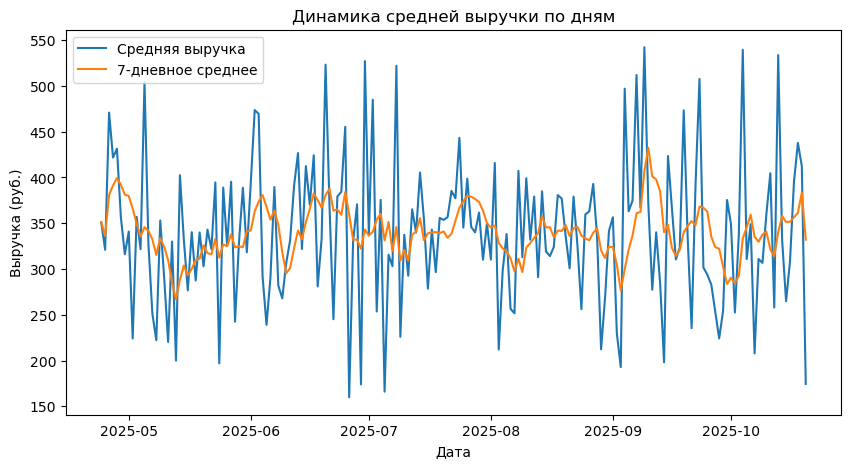


Будни vs выходные:
            Duration_min     Revenue  Avg_speed
IsWeekend                                     
Weekday       99.037253  343.080950   6.913397
Weekend       96.659443  328.790108   6.860724


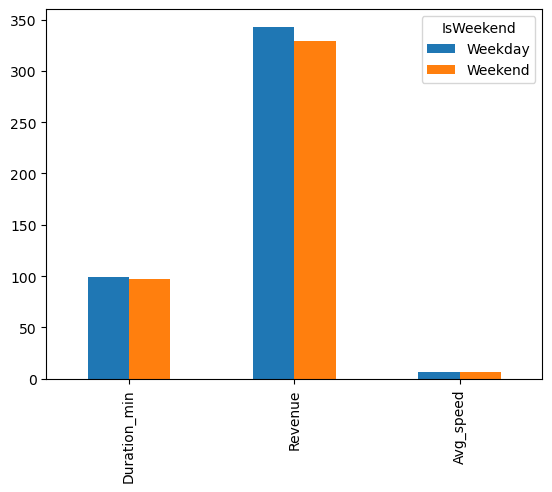

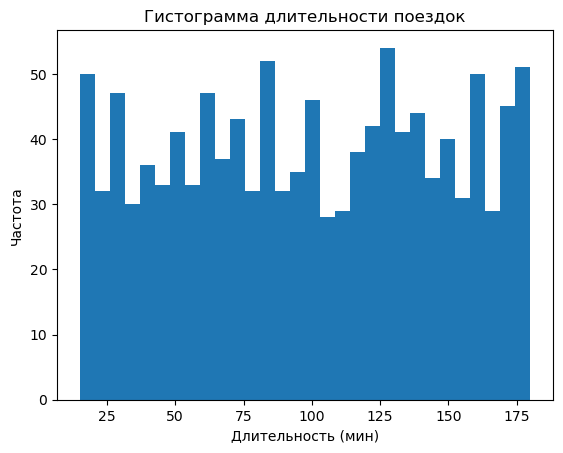

Аномальные поездки:            Date  Car_ID  Duration_min  Distance_km     Revenue   Fuel_cost  \
27   2025-04-27       9           175    14.221423  425.774296   92.957880   
58   2025-05-01      12           177    22.130341  654.671453  169.006103   
73   2025-05-04       5           177    25.158655  717.251867  159.787675   
84   2025-05-05      11           178    21.141024  733.446095  160.022619   
90   2025-05-06       9           175    19.037282  590.685347  129.698585   
95   2025-05-07      17           175    19.741491  575.428836  134.641337   
152  2025-05-14      19           178    21.002347  577.942375  147.795361   
210  2025-05-23      13           175    24.853227  774.392564  166.488749   
223  2025-05-25      10           177    23.554575  752.809064  152.202306   
264  2025-06-02       2           180    21.551015  687.362064  181.066455   
319  2025-06-10      10           178    23.181742  672.248540  207.017029   
334  2025-06-11       1           178    16.

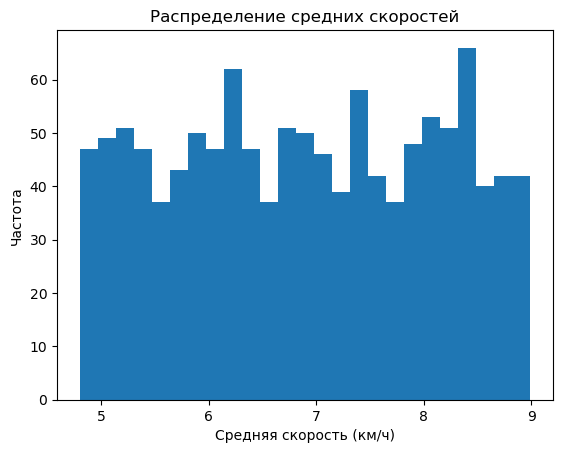

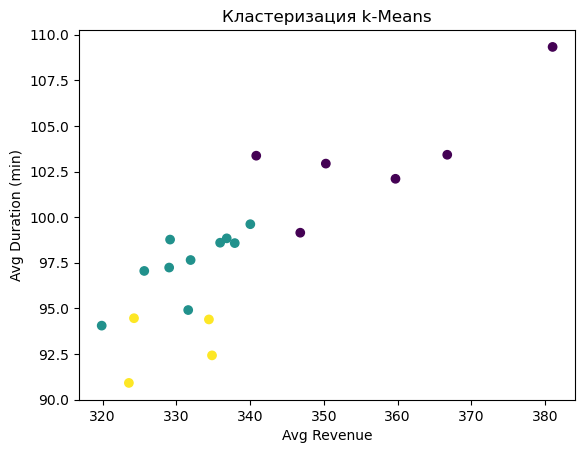

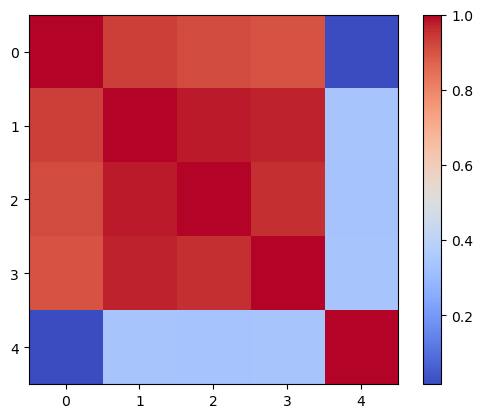

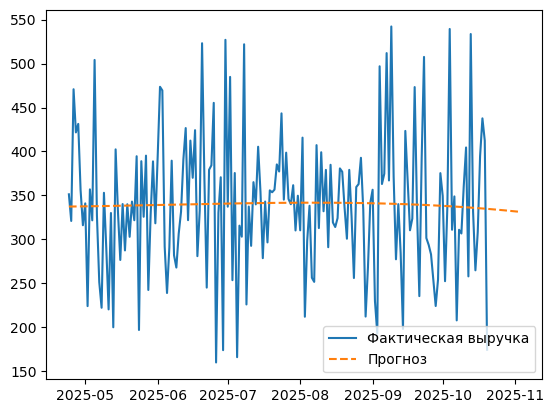

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# === 0. Загрузка данных ===
# Подсказка: используйте pd.read_csv("carsharing.csv", parse_dates=["Date"])
data = pd.read_csv("dop_carsharing.csv", parse_dates=["Date"])

# Добавьте новые колонки
# Profit = Revenue - Fuel_cost
# Avg_speed = Distance_km / (Duration_min/60)
data["Profit"] = data["Revenue"]-data["Fuel_cost"]
data["Avg_speed"] = data["Distance_km"] / (data["Duration_min"]/60)
print(data.head())

# === 1. Предварительный анализ ===
# Найдите топ-5 автомобилей по выручке
top_cars = data.groupby("Car_ID")["Revenue"].sum().nlargest(5)
# Найдите 5 машин с наименьшей рентабельностью
low_profit_cars = data.groupby("Car_ID")["Profit"].mean().nsmallest(5)

print("Топ-5 автомобилей по выручке:\n", top_cars)
print("\n5 автомобилей с наименьшей рентабельностью:\n", low_profit_cars)

# === 2. Временные ряды ===
# Средняя выручка по дням
daily_revenue = data.groupby("Date")["Revenue"].mean().sort_index()
# 7-дневное скользящее среднее
rolling_avg = daily_revenue.rolling(window=7, min_periods=1).mean()

# Постройте график динамики
plt.figure(figsize=(10,5))
plt.plot(daily_revenue.index, daily_revenue.values, label="Средняя выручка")
plt.plot(rolling_avg.index, rolling_avg.values, label="7-дневное среднее")
plt.xlabel("Дата")
plt.ylabel("Выручка (руб.)")
plt.title("Динамика средней выручки по дням")
plt.legend()
plt.show()

# === 3. Будни vs выходные ===
# Создайте колонку IsWeekend (True/False)
data["Weekday"] = data["Date"].dt.weekday
data["IsWeekend"] = data["Weekday"] >= 5

# Сравните средние значения
weekend_stats = data.groupby("IsWeekend").agg({
    "Duration_min": "mean",
    "Revenue": "mean",
    "Avg_speed": "mean"
}).rename(index={False:"Weekday", True:"Weekend"})

print("\nБудни vs выходные:\n", weekend_stats)

# Постройте график
weekend_stats.T.plot(kind="bar")
plt.show()

# === 4. Сравнительный анализ поездок ===
# Постройте гистограмму длительности поездок
plt.hist(data["Duration_min"], bins=30)
plt.xlabel("Длительность (мин)")
plt.ylabel("Частота")
plt.title("Гистограмма длительности поездок")
plt.show()

# Найдите 95-й перцентиль и выделите аномальные поездки
threshold = np.percentile(data["Duration_min"], 95)
print("Аномальные поездки:", data[data["Duration_min"] > threshold])

# Постройте распределение средних скоростей
plt.hist(data["Avg_speed"], bins=25)
plt.xlabel("Средняя скорость (км/ч)")
plt.ylabel("Частота")
plt.title("Распределение средних скоростей")
plt.show()

# === 5. Кластеризация автомобилей ===
# Рассчитайте средние показатели для каждого Car_ID
car_features = data.groupby("Car_ID").agg({
    "Revenue": "mean",
    "Duration_min": "mean",
    "Avg_speed": "mean"
}).rename(columns={
    "Revenue": "Avg_Revenue",
    "Duration_min": "Avg_Duration",
    "Avg_speed": "Avg_Speed"
})


# Нормализация данных
scaled = StandardScaler().fit_transform(car_features[["Avg_Revenue", "Avg_Duration", "Avg_Speed"]])

# Кластеризация k-means
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(scaled)
car_features["Cluster"] = labels

# Постройте scatter plot
plt.scatter(car_features["Avg_Revenue"], car_features["Avg_Duration"], c=labels, cmap="viridis")
plt.xlabel("Avg Revenue")
plt.ylabel("Avg Duration (min)")
plt.title("Кластеризация k-Means")
plt.show()

# === 6. Корреляции ===
corr = data[["Duration_min","Distance_km","Revenue","Fuel_cost","Avg_speed"]].corr()
plt.imshow(corr, cmap="coolwarm")
plt.colorbar()
plt.show()

# === 7. Прогнозирование ===
# Создайте массив дней
days = np.arange(len(daily_revenue))

# Постройте полином (polyfit и poly1d)
coeffs = coeffs = np.polyfit(days, daily_revenue.values, deg=3)
poly = np.poly1d(coeffs)

# Прогноз на 14 дней вперёд
future_days = np.arange(len(daily_revenue) + 14)
future_pred = poly(future_days)
future_dates = pd.date_range(start=daily_revenue.index.min(), periods=len(daily_revenue) + 14)

# График прогноза
plt.plot(daily_revenue.index, daily_revenue.values, label="Фактическая выручка")
plt.plot(future_dates, future_pred, label="Прогноз", linestyle="--")
plt.legend()
plt.show()



## Доп. задание

Сгенерируйте собственный датасет carsharing.csv для анализа.

### Формат файла:

Date — дата поездки (YYYY-MM-DD, в пределах 6 месяцев),

Car_ID — номер автомобиля (например, от 1 до 20),

Duration_min — длительность аренды в минутах (15–180),

Distance_km — пройденное расстояние (пропорционально длительности, с шумом),

Revenue — доход от поездки (руб., зависит от расстояния),

Fuel_cost — стоимость топлива (руб., зависит от расстояния).

Сгенерируйте не менее 1000 строк с реалистичными значениями.

## Подсказки

* Используйте pandas.DataFrame для сборки таблицы.

* Для случайных чисел используйте numpy.random.

* Для дат — pandas.date_range.

* Для сохранения файла — .to_csv("carsharing.csv", index=False).

In [2]:
import pandas as pd
import numpy as np

# Установите зерно генератора для воспроизводимости
np.random.seed(42)

# === Параметры генерации ===
num_days = 180          # количество дней (например, 180)
num_cars = 20          # количество машин (например, 20)
records_per_day = (np.random.randint(3, 11, size=num_days))  # случайное количество поездок на день (используйте np.random.randint)

# Создайте список дат
dates = pd.date_range(start='2025-04-24', periods=num_days)

data = []

for i, date in enumerate(dates):
    for _ in range(records_per_day[i]):
        # Случайный ID автомобиля
        car_id = np.random.randint(1, num_cars + 1)
        
        # Сгенерируйте длительность поездки (15–180 минут)
        duration = np.random.randint(15,181)
        
        # Дистанция примерно пропорциональна длительности, но добавьте шум
        distance = max(1, duration * np.random.uniform(0.08, 0.15))
        
        # Доход зависит от дистанции (например, расстояние * коэффициент)
        revenue = distance * np.random.uniform(25, 35)
        
        # Стоимость топлива также пропорциональна дистанции
        fuel_cost = distance * np.random.uniform(6, 9)
        
        data.append([date, car_id, duration, distance, revenue, fuel_cost])

# Соберите DataFrame
df = pd.DataFrame(data, columns=["Date","Car_ID","Duration_min","Distance_km","Revenue","Fuel_cost"])

# Сохраните в CSV
df.to_csv("dop_carsharing.csv", index=False, encoding="utf-8")

print("Файл dop_carsharing.csv сгенерирован! Количество строк:", df.shape[0])
print(df.head())


Файл dop_carsharing.csv сгенерирован! Количество строк: 1182
        Date  Car_ID  Duration_min  Distance_km     Revenue   Fuel_cost
0 2025-04-24       5           145    19.321968  591.499008  160.621620
1 2025-04-24       7            41     4.780243  139.943581   29.045988
2 2025-04-24      13            77    10.988166  326.938613   84.497091
3 2025-04-24       4           165    20.181021  613.470961  133.380073
4 2025-04-24      13           174    21.214181  677.747470  183.320302
